# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need

from sklearn.model_selection import train_test_split

%matplotlib inline

## Loading the raw data


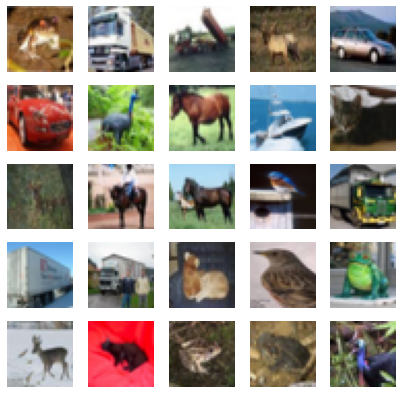

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

plt.figure(figsize=(7, 7))
show_imgs(X_train)

In [4]:
X_train =  X_train.astype("float32")
X_test =   X_test.astype("float32")
X_train /= 255
X_test /=  255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


# One-layer network
## Define the network

In [12]:
E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## Compile and train the network

In [13]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics="accuracy")

In [14]:
log = model.fit(X_train, y_train, batch_size=B, epochs=E, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 42s 135ms/step - loss: 1.6843 - accuracy: 0.4084 - val_loss: 1.4686 - val_accuracy: 0.4953
Epoch 2/5
313/313 [==============================] - 37s 119ms/step - loss: 1.3653 - accuracy: 0.5264 - val_loss: 1.3888 - val_accuracy: 0.5117
Epoch 3/5
313/313 [==============================] - 34s 110ms/step - loss: 1.2495 - accuracy: 0.5675 - val_loss: 1.2470 - val_accuracy: 0.5743
Epoch 4/5
313/313 [==============================] - 35s 112ms/step - loss: 1.1662 - accuracy: 0.5974 - val_loss: 1.1955 - val_accuracy: 0.5923
Epoch 5/5
313/313 [==============================] - 35s 112ms/step - loss: 1.1085 - accuracy: 0.6156 - val_loss: 1.1606 - val_accuracy: 0.6056


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

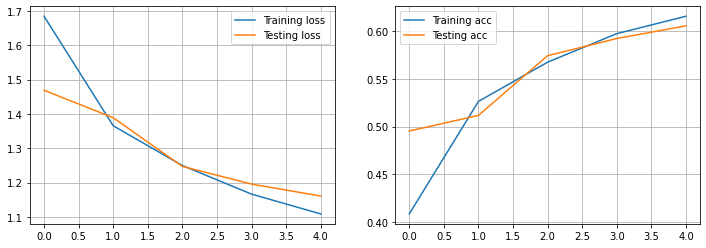

In [15]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [16]:
loss_test, metric_test = model.evaluate(X_test, y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.1507 - accuracy: 0.5967
Test loss: 1.1506853103637695
Test accuracy: 0.5967000126838684


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [17]:
import sklearn.metrics as me

pred = model.predict_classes(X_test, verbose=1)
me.confusion_matrix(y_test, pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
313/313 [==============================] - 4s 12ms/step


array([[592,  38,  95,   8,  18,   7,  23,  16, 144,  59],
       [ 23, 706,  20,   7,   5,   4,  13,   9,  56, 157],
       [ 65,  12, 473,  31, 120,  79, 105,  61,  32,  22],
       [ 14,  14, 113, 271, 116, 180, 153,  68,  23,  48],
       [ 25,   4, 153,  27, 500,  48, 122,  94,  16,  11],
       [ 13,   6, 107, 101,  82, 477,  66, 107,  24,  17],
       [  5,   6,  52,  25,  50,  20, 802,  12,   8,  20],
       [  8,   4,  43,  27,  73,  73,  24, 693,   9,  46],
       [ 71,  65,  23,   9,   6,   8,  13,  10, 750,  45],
       [ 34, 108,  12,   7,  13,  12,  23,  33,  55, 703]], dtype=int64)

## Hyperparameter tuning

[32, 64]
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 

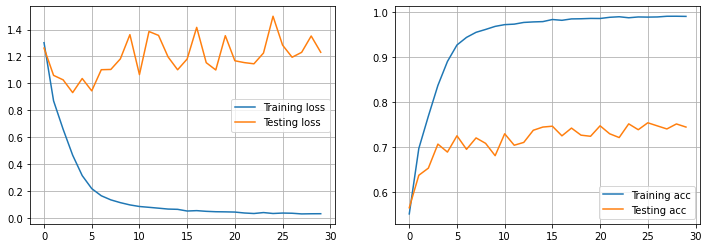

[32, 64, 128]
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32,

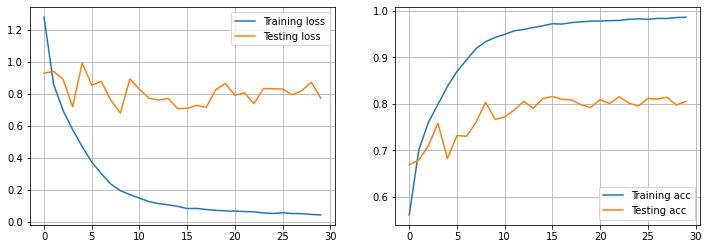

[32, 64, 128, 256]
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None

1250/1250 [==============================] - 875s 700ms/step - loss: 0.0681 - accuracy: 0.9766 - val_loss: 0.6128 - val_accuracy: 0.8442
Epoch 30/30
1250/1250 [==============================] - 879s 703ms/step - loss: 0.0730 - accuracy: 0.9750 - val_loss: 0.6198 - val_accuracy: 0.8461


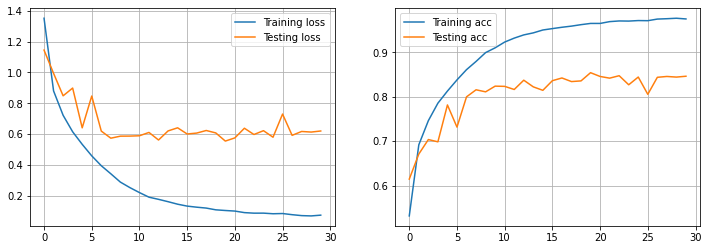

In [22]:
E = 30              # number of epochs
B = 32               # batch size


for layers in [
    [32, 64],
    [32, 64, 128],
    [32, 64, 128, 256]
]:
    print(layers)
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(filters=layers[0], kernel_size=(3, 3), strides=1, padding="same", activation=None,
                                     input_shape=(32,32,3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Conv2D(filters=layers[0], kernel_size=(3, 3), strides=1, padding="same", activation=None))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    for layer in layers[1:]:        
        model.add(tf.keras.layers.Conv2D(filters=layer, kernel_size=(3, 3), strides=1, padding="same", activation=None))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.MaxPooling2D())
        model.add(tf.keras.layers.Dropout(0.2))
        
        
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(1024, activation=None))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics="accuracy")

    model.summary()
    log = model.fit(X_train, y_train, batch_size=B, epochs=E, validation_split=0.2)

    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(log.history['loss'], label='Training loss')
    ax1.plot(log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(log.history['accuracy'], label='Training acc')
    ax2.plot(log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()
    plt.show()

In [23]:
loss_test, metric_test = model.evaluate(X_test, y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 22s 70ms/step - loss: 0.6630 - accuracy: 0.8400
Test loss: 0.6630086302757263
Test accuracy: 0.8399999737739563


Depth might be an important factor -> fabian maybe can run faster experiments?